In [1]:
import warnings 
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv('Loan_default.csv')
data.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,M9M6PZYIGO,61,91255,214628,585,79,3,18.20,24,0.13,Master's,Unemployed,Married,No,Yes,Education,No,0
1,M9MI7KTP6B,66,60013,197081,615,3,2,7.21,12,0.60,PhD,Unemployed,Single,No,Yes,Home,No,0
2,M9N6IWH30C,26,34386,139439,822,11,2,2.69,36,0.72,Master's,Unemployed,Married,Yes,Yes,Education,Yes,0
3,M9OW2BVLDV,43,72644,98515,589,22,2,24.52,12,0.27,Bachelor's,Unemployed,Divorced,No,No,Education,No,0
4,M9Q6Y6NJJP,33,89969,69204,544,115,4,12.78,48,0.50,High School,Unemployed,Married,Yes,Yes,Business,No,0
5,M9Q8R1R8OI,40,72446,67407,499,74,2,22.03,60,0.12,High School,Unemployed,Married,Yes,No,Home,Yes,0
6,M9R71CLAWX,21,24249,95845,600,114,4,11.01,24,0.35,Master's,Unemployed,Single,No,No,Home,Yes,0
7,M9TP681L7Z,33,45126,174021,431,119,2,7.52,60,0.27,Master's,Unemployed,Single,No,Yes,Auto,Yes,0
8,M9TS3P1I3Y,44,24006,73076,718,81,1,9.16,60,0.63,PhD,Unemployed,Married,Yes,No,Education,No,0
9,M9UZE7TDOA,30,115924,171783,444,41,1,22.95,48,0.25,High School,Unemployed,Divorced,No,Yes,Education,Yes,0


In [3]:
data.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42478 entries, 0 to 42477
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          42478 non-null  object 
 1   Age             42478 non-null  int64  
 2   Income          42478 non-null  int64  
 3   LoanAmount      42478 non-null  int64  
 4   CreditScore     42478 non-null  int64  
 5   MonthsEmployed  42478 non-null  int64  
 6   NumCreditLines  42478 non-null  int64  
 7   InterestRate    42478 non-null  float64
 8   LoanTerm        42478 non-null  int64  
 9   DTIRatio        42478 non-null  float64
 10  Education       42478 non-null  object 
 11  EmploymentType  42478 non-null  object 
 12  MaritalStatus   42478 non-null  object 
 13  HasMortgage     42478 non-null  object 
 14  HasDependents   42478 non-null  object 
 15  LoanPurpose     42478 non-null  object 
 16  HasCoSigner     42478 non-null  object 
 17  Default         42478 non-null 

In [5]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
obj_col = ['HasCoSigner','LoanPurpose','HasDependents', 'HasMortgage','MaritalStatus', 'EmploymentType', 'Education']
for col in obj_col:
    data[col] = le.fit_transform(data[col])
data = data.drop(['LoanID'], axis=1)

In [6]:
data.dtypes

Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education           int32
EmploymentType      int32
MaritalStatus       int32
HasMortgage         int32
HasDependents       int32
LoanPurpose         int32
HasCoSigner         int32
Default             int64
dtype: object

In [7]:
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,61,91255,214628,585,79,3,18.20,24,0.13,2,3,1,0,1,2,0,0
1,66,60013,197081,615,3,2,7.21,12,0.60,3,3,2,0,1,3,0,0
2,26,34386,139439,822,11,2,2.69,36,0.72,2,3,1,1,1,2,1,0
3,43,72644,98515,589,22,2,24.52,12,0.27,0,3,0,0,0,2,0,0
4,33,89969,69204,544,115,4,12.78,48,0.50,1,3,1,1,1,1,0,0


In [8]:
corr = data.corrwith(data['Default'])
print(corr.sort_values(ascending=False))

Default           1.000000
InterestRate      0.212834
LoanAmount        0.135143
NumCreditLines    0.040505
DTIRatio          0.037887
LoanTerm         -0.001154
MaritalStatus    -0.011400
LoanPurpose      -0.021718
HasMortgage      -0.034022
Education        -0.040321
HasDependents    -0.054276
CreditScore      -0.055692
HasCoSigner      -0.068128
Income           -0.148002
MonthsEmployed   -0.151620
Age              -0.274317
EmploymentType   -0.854730
dtype: float64


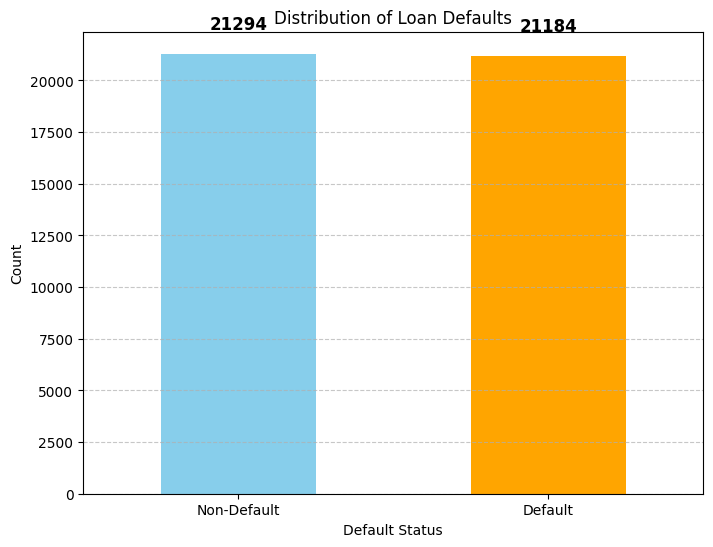

In [9]:
default_counts = data['Default'].value_counts()
plt.figure(figsize=(8, 6))
default_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Loan Defaults')
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Default', 'Default'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the counts on top of each bar
for i, count in enumerate(default_counts):
    plt.text(i, count + 1000, f'{count}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.show()

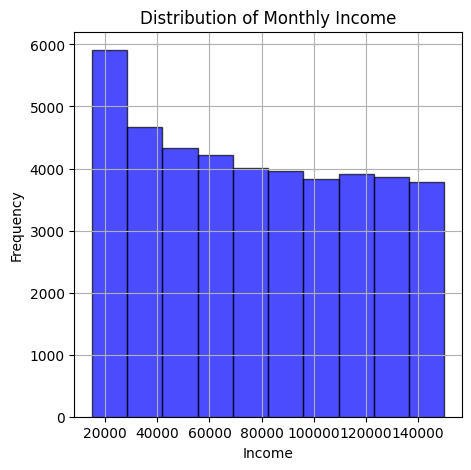

In [10]:
plt.figure(figsize=(5, 5))
plt.hist(data['Income'], bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Monthly Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Axes: >

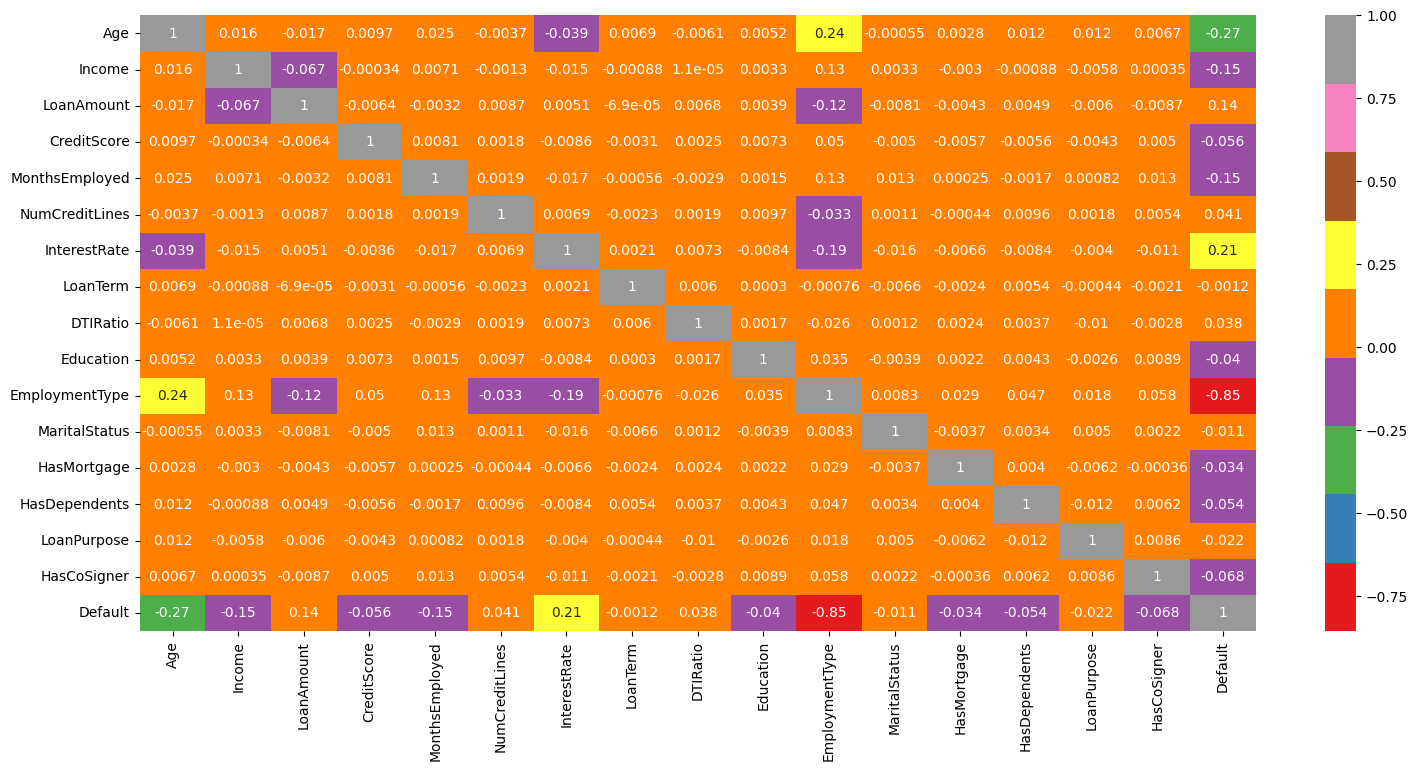

In [11]:
plt.figure(figsize=(18,8))
corr2 = data.corr()
sns.heatmap(corr2, annot=True, cmap='Set1')

In [12]:
X = data.drop(['Default'], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X, data.Default, test_size = 0.2, random_state=42)

In [13]:
models = [
    XGBClassifier(),
    RandomForestClassifier(random_state=42),
    LogisticRegression(),
    GaussianNB() 
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    model_name = model.__class__.__name__
    print(f'{model_name} - Precision: {score:.2f}')

XGBClassifier - Precision: 0.99
RandomForestClassifier - Precision: 0.99
LogisticRegression - Precision: 0.69
GaussianNB - Precision: 0.80


KNeighborsClassifier() - Precision: 0.92


<Figure size 800x600 with 0 Axes>

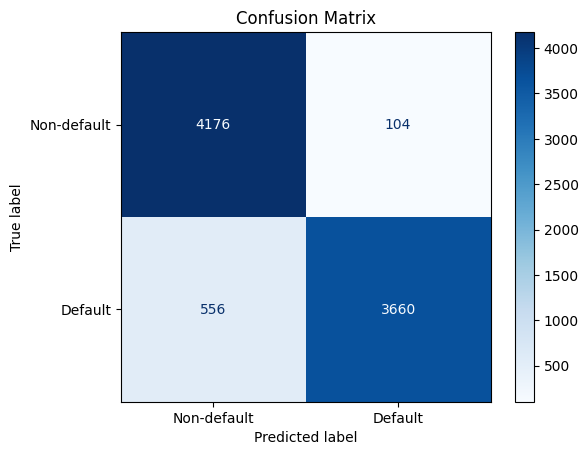

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
score = accuracy_score(y_pred, y_test)
print(f'{knn} - Precision: {score:.2f}')

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-default", "Default"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

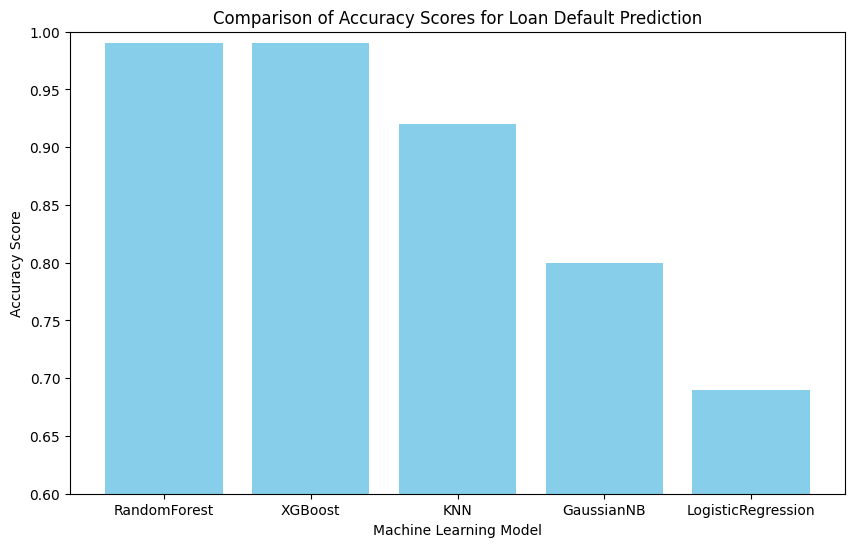

In [15]:
models = ['RandomForest', 'XGBoost', 'KNN', 'GaussianNB', 'LogisticRegression']
accuracy_scores = [0.99, 0.99, 0.92, 0.80, 0.69]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color='skyblue')
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy Scores for Loan Default Prediction')
plt.ylim(0.6, 1.0)  # Set y-axis limit for better visualization
plt.show()


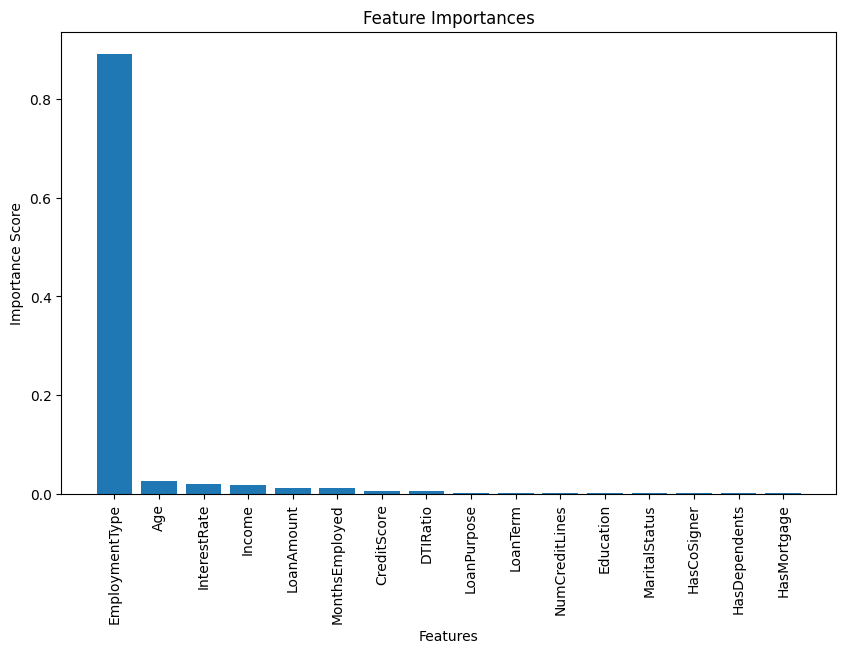

In [16]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
cm
feature_importances = rf.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

feature_importances = rf.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Get the names of features from the training dataset
feature_names = X_train.columns

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

<Figure size 800x600 with 0 Axes>

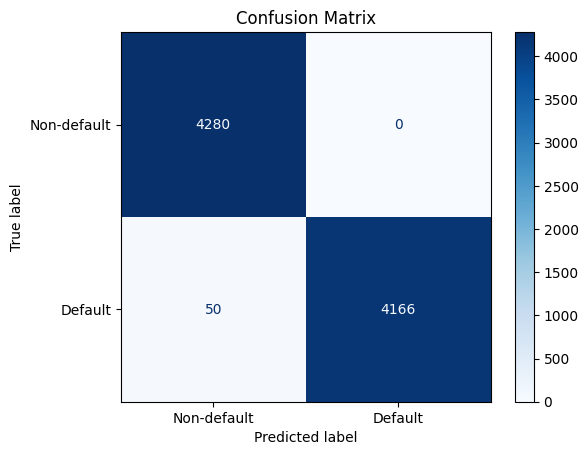

In [17]:
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-default", "Default"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

<Figure size 800x600 with 0 Axes>

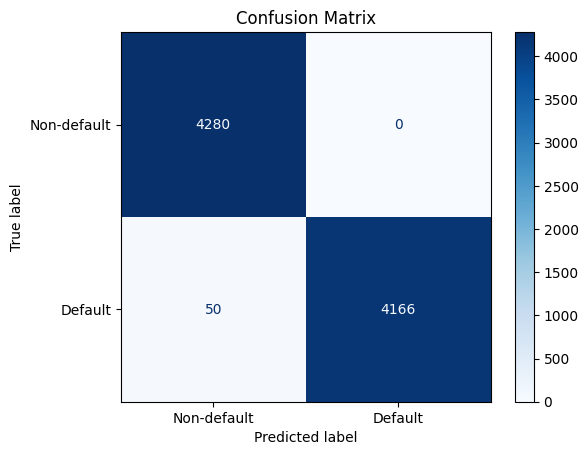

In [18]:
xg =  XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-default", "Default"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

<Figure size 800x600 with 0 Axes>

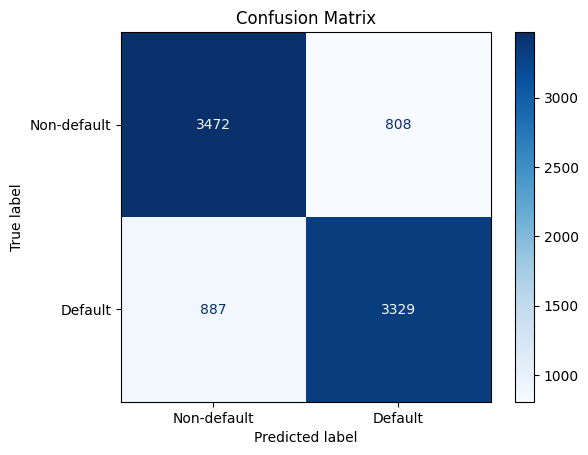

In [19]:
nb =  GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-default", "Default"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

<Figure size 800x600 with 0 Axes>

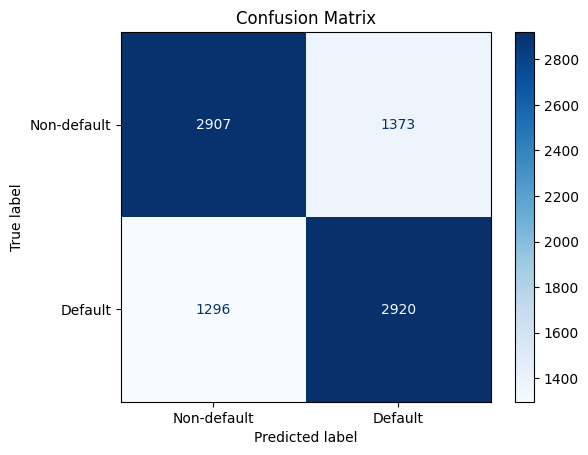

In [20]:
lg =  LogisticRegression()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-default", "Default"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

            <option value="0">High School</option>
            <option value="1">Bachelor's</option>
            <option value="2">Master's</option>
            <option value="3">PHD</option>

            <option value="0">Full-Time</option>
            <option value="1">Part-Time</option>
            <option value="2">Self-Employed</option>
            <option value="3">Unemployed</option>

            <option value="0">Divorced</option>
            <option value="1">Married</option>
            <option value="2">Single</option>

            <option value="0">Auto</option>
            <option value="1">Business</option>
            <option value="2">Education</option>
            <option value="3">Home</option>
            <option value="4">Other</option>

In [21]:
# import pickle
# rf = RandomForestClassifier(random_state=42)
# rf.fit(X_train, y_train)
# with open('rf.pkl', 'wb') as file:
#     pickle.dump(rf, file)


In [22]:
import pickle

with open('rf.pkl', 'rb') as file:
    model = pickle.load(file)

prediction = model.predict([[58,42836,243206,643,113,2,14.78,24,0.82,3,3,2,1,0,2,1]])

print(prediction)


[1]
